<a href="https://colab.research.google.com/github/ricardoricrob76/machinelearning/blob/main/Decision_Trees_DataSet_de_Pessoas_com_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Dependências

In [ ]:
import numpy as np
import pydotplus
from IPython.display import Image
from sklearn import tree

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
!pip install graphviz

In [ ]:
!pip install pydotplus

**Dependências:**
- conda install graphviz
- conda install -c conda-forge pydotplus

*Em caso de erro*: 
- *pip install graphviz*
- *adicionar a pasta "C:\Users\Arnaldo\Miniconda3\Library\bin\graphviz" ao path das variáveis de ambiente*

# 1. Introdução 

**Árvores de Decisão** são um dos algoritmos de Machine Learning mais fáceis de implementar. A ideia principla é dividir o problema em sub-problemas mais simples até que se resolva o problema. Nas árvores, cada **nó de decisão** contém um teste em um atributo, cada **folha** representa uma classe ou um valor (no caso da regressão) e o percurso da raiz até uma folha representa uma **regra de classificação/regressão**. Um atributo pode aparecer mais de uma vez na árvore, porém com valores diferentes. 

As **condições de paradas** podem ser inúmeras:
- Os atributos acabaram (no caso em que os atributos não se repetem na árvore)
- Todos os exemplos são de uma mesma classe
- A altura da árvore atingiu um valor previamente definido
- O número de exemplos a serem divididos é menor que um valor definido

**Vantagens:**
- Fáceis de entender e explicar. Mais fácil inclusive que regressão linear
- Algumas pessoas acreditam que ás arvores de decisão representam a tomada de decisão mais próxima dos seres humanos.
- Podem ser mostradas graficamente e facilmente interpretadas por não-especialistas
- Trabalha tanto com variáveis qualitativas e quantitativas sem precisar de pré-processamento

**Desvantagens:**
- A precisão não é tão boa quanto outros algoritmos
- Não são robustas. Uma pequena mudança nos dados pode causar uma grande diferença na árvore final.

**Algoritmo básico:**
1. Escolher um atributo
2. Dividir o (sub-)banco por uma valor específico do atributo
3. Para cada folha:
    
    3.1: Se todos os exemplos são da mesma classe, associar essa classe aos exemplos
    
    3.2: Caso contrário, repetir os passos 1 a 3
    
## Impureza e Ganho de Informação

*Como escolher o melhor atributo?* Existem muitas medidas e algoritmos diferentes:
- **ID3 e C4.5**: utilizam *ganho da informação*.
- **CART**: utiliza *impureza de Gini*.
- **CHAID**: utilizam significância estatística.

Em geral, todas as abordagens concordam em dois pontos:
- Uma divisão que mantém as proporções das classes é inútil
- Uma divisão onde todos os exemplos são da mesma classe, tem utilidade máxima

### Entropia
A **Entropia** caracteriza a impureza de uma coleção arbitrária de exemplos.

Seja $S$ uma amostra de exemplos e $p_i$ a probabilidade de cada classe $i$. A entropia $E(S)$ é definida como:

$$E(S) = \sum_i^n{p_i\ln{p_i}}$$

### Ganho de Informação

O **Ganho de Informação (GI)** é a diferença entre a impureza atual (entropia, gini, etc..) e a impureza ponderada dos dois novos grupos. Intuitivamente, o **GI representa a divisão que reduz a impureza, ou seja, obtém grupos mais homogêneos em comparação com o grupo antes da divisão**. Comparando o GI para várias divisões baseadas nas regras de divisão diferente nos permite escolher a "melhor" divisão.

# 2. Dados

In [ ]:
df = pd.read_csv('diabetes.csv', sep=',')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']])
#Definição do atributo de classificacao
data_classif = np.array(df['Outcome'])

# 3. Implementação 

# 4. Teste 

x[2] >= 85 | x[0] == Sol | Leaf: y = Não
             x[0] != Sol | x[0] == Nublado | Leaf: y = Sim
                           x[0] != Nublado | x[1] >= 71 | Leaf: y = Não
                                             x[1] <  71 | Leaf: y = Sim
x[2] <  85 | x[1] >= 68 | Leaf: y = Sim
             x[1] <  68 | x[0] == Nublado | Leaf: y = Sim
                          x[0] != Nublado | Leaf: y = Não



array(['Sim'], dtype='<U3')

### Comparação com o Scikit-learn

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(data_treino, data_classif)

DecisionTreeClassifier()

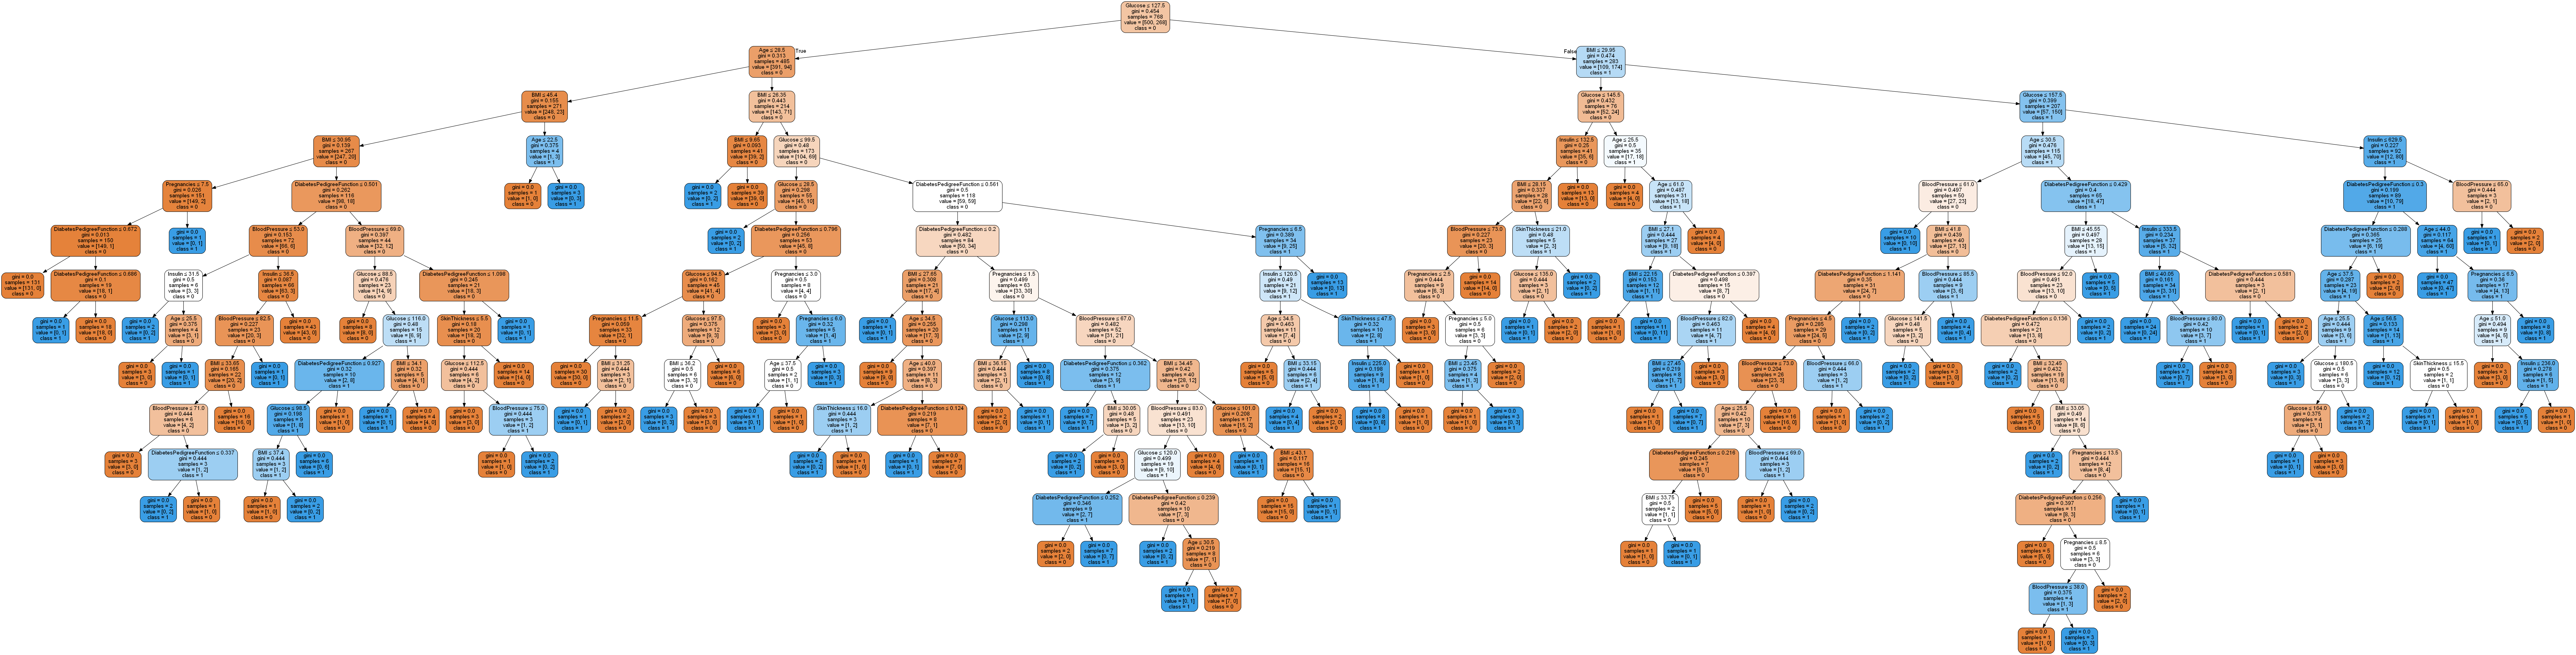

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age'], 
                                class_names=["0", "1"],
                                filled=True, rounded=True,
                                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## 5. Referências